In [2]:
from telethon.tl.functions.messages import GetHistoryRequest
from telethon.tl.types import User, PeerUser
from telethon.errors import FloodWaitError
from telethon import TelegramClient
from dotenv import load_dotenv 

import parsers.telegram.telegram_parse as telegram_parse
import parsers.discord.discord_parse as discord_parse
import parsers.instagram.instagram_parse as instagram_parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import asyncio
import os 
import re
import json 
import time 
import openai



In [3]:
telegram: bool = True                                 # Whether parse telegram data
t_parse_type = "local"                                # "local" or global" # Whether parse your messages through JSON Files that located locally (Fast way) or globally: (Via API) (takes 1 hour for ~20k messages) (Fill .env file)
json_path = "/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/telegram/result.json" # If t_parse_type is "local", then fill it
telegram_save_path = r"/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/telegram/result.csv"  # If t_parse_type is "global", then fill it
# Requires openai for question generation
instagram: bool = True                               # Whether parse instagram data
inbox_path = "parsers/instagram/your_instagram_activity/messages/inbox"  # Path to your instagram inbox
instagram_username = os.getenv('INSTAGRAM_USERNAME')                 # Your instagram username
# Requires openai for question generation
discord: bool = False                                # Whether parse discord data
discord_package_folder = "parsers/discord/package"    # Root folder that contains all the dialogs (Originally named "package")

message_limit: int = None                             # The maximum amount of messages to be processed total
dialogs_limit: int = None                             # The maximum amount of dialogs to be processed
verbose=1                                             # The amount of output to be printed
checkpoints: bool = True                              # To save data during parsing
threshold: int = 50      
save_csv: bool = False                                 # Drop the dialog if it has less or equal messages than the threshold
data_save_folder: str = "Datasets"


In [4]:
def optimize_messages(messages):
      """
      Function which uses a set of tuning algorithms to meet the criteria of optimized data for future models.
      """

      # TODO: Include only messages in ukrainian language


      # TODO: Put todos below in order of priority 
      # For each of the points below, if true: add one, if false: minus one
      # TODO: Add detection system for context and response:

      # TODO: If the message contains question mark in the end of the message, it is a context
      # TODO: The first message of the new day is probably a context.
      # TODO: If there are few messages in a row from user, concatenate them into one message.
      # TODO: If there is a significant time gap (e.g., several hours) between messages, the first message after the gap might be a context.
      # TODO: Look for specific keywords or phrases that typically indicate a context (e.g., "What do you think about...", "Can you explain...", "Why is...").
      # TODO: If a message is a direct reply to a previous context message, it is likely a response.
      # TODO: Short messages that directly follow a context are likely responses.
      # TODO: If the same user repeatedly sends messages ending with question marks or messages at the start of the day, those are likely contexts.
       

In [5]:

def generate_context(response): # GPT Required 
      """
      Uses AI to generate context based on response
      """ 
      #openai.api_key = os.getenv('OPENAI_API_KEY')

      prompt = f'Classify the following message as either "context" or "response":\n\n"{message}"\n\nAnswer with one word only.'
      
      response = openai.Completion.create(
            engine="GPT-4",  # Choose a suitable engine
            prompt=prompt,
            max_tokens=10,
            n=1,
            stop=None,
            temperature=0.5,
      )
      
      return response.choices[0].text.strip()

In [6]:
async def main(telegram = telegram,
               instagram = instagram,
               discord = discord,
               discord_path = discord_package_folder,
               **kwargs) -> list: 
      """
      Returns: 
            List: A list with true boolean parsers.
      """
      
      to_return = {}
      
      if telegram:
            telegram_df = await telegram_parse.main(parse_type=t_parse_type,json_path=json_path, save_path=telegram_save_path, **kwargs,)
            to_return['telegram_dataset'] = telegram_df
      if instagram:
            instagram_df = instagram_parse.main(inbox_path=inbox_path, instagram_username=instagram_username, **kwargs)
            to_return['instagram_dataset'] = instagram_df
      if discord:
            discord_df = discord_parse.main(path=discord_path, **kwargs)
            to_return['discord_dataset'] = discord_df

      return to_return

      print("Done!")

In [7]:
kwargs = {
      "save_csv": save_csv,
      "message_limit": message_limit,
      "dialogs_limit": dialogs_limit,
      "verbose": verbose,
      "checkpoints": checkpoints,
      "threshold": threshold
}

datasets = await main(**kwargs)
      
# # Iterating over the dictionary key and assigning proper name to it. telegram_dataset = telegram_df
# for key, value in datasets.items():
#     locals()[key] = value

total_messages = sum([len(row_len) for row_len in datasets.values()])
print(f"Collected total of {total_messages} messages")  

# Concatenating dataframes
dataset = pd.DataFrame(columns=['Message', 'Sender', 'Date'])
for key, value in datasets.items():
      dataset = pd.concat([dataset, value])
      print(f"Concatenated {key}")

concatenated_path = os.path.join(data_save_folder, 'concatenated.csv')
if not os.path.exists(concatenated_path):
      print(f"Saving to {concatenated_path}")
      dataset.to_csv(concatenated_path, index=False)

TELEGRAM: Start processing. Total dialogs: 161
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exception: 'from_id'
Exceptio

/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data])
/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data])
/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:7

Instagram: DONE
Collected total of 64747 messages
Concatenated telegram_dataset
Concatenated instagram_dataset


/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data])
/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data])
/Users/bohdan/Documents/Programming/Projects/VSCode/AI-DataScience/PersonaGPT/parsers/instagram/instagram_parse.py:7

# Data Visualization 

In [8]:
concatenated_path = os.path.join(data_save_folder, 'concatenated.csv')
dataset = pd.read_csv(concatenated_path)
dataset["Message"].to_string
dataset.head(100)

,Message,Sender,Date,Sent_by_me
0,Ахуєть АХАХАХХАХАХАХ,1037155651,2022-02-17T13:11:59,True
1,"ти йдеш до школи? блять, Бодя це піздєц",736968549,2022-02-23T23:59:29,False
2,Нє Я знаю якисб піздєц Твориться,1037155651,2022-02-23T23:59:40,True
3,це реальний піздєц. Путін нападає вже,736968549,2022-02-23T23:59:47,False
4,Реал?,1037155651,2022-02-24T00:00:08,True
...,...,...,...,...
95,ютуб в помощь схаззахсха,736968549,2022-03-08T15:51:57,False
96,Вооюще ахуєнно получається,1037155651,2022-03-08T15:52:03,True
97,дякуююю,736968549,2022-03-08T15:52:07,False
98,Лайк,1037155651,2022-03-08T15:52:18,True


In [9]:
def simplify_date(date): # For graphs 
      date = pd.to_datetime(date)
      return date.strftime("%Y-%m-%d")

In [10]:
dataset['Date'] = dataset['Date'].apply(simplify_date)
dataset["Date"].head(100)

0     2022-02-17
1     2022-02-23
2     2022-02-23
3     2022-02-23
4     2022-02-24
         ...    
95    2022-03-08
96    2022-03-08
97    2022-03-08
98    2022-03-08
99    2022-03-08
Name: Date, Length: 100, dtype: object

In [11]:
# Missing values? 
dataset.isna().sum().sum()

np.int64(0)

In [12]:
# Sort by date 
dataset = dataset.sort_values('Date')

In [13]:
def plot_message_count_over_time(data, period='D'):
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Resample the data by the specified period (e.g., day, week, month)
    messages_by_time = data.resample(period, on='Date').size()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.bar(messages_by_time.index, messages_by_time.values, color='skyblue')
    plt.title(f'Messages Sent Per {period}', fontsize=16)
    plt.xlabel(f'Time ({period})', fontsize=12)
    plt.ylabel('Number of Messages', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

In [14]:
def plot_heatmap(dataset):
    # Make a full copy of the dataset, not just the 'Date' column
    df = dataset.copy()

    # Ensure 'Date' is in datetime format
    df["Date"] = pd.to_datetime(df["Date"])

    # Extract Year, Month, and Day from the 'Date' column
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day

    # Group by Year, Month, and Day and count occurrences
    grouped_data = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Message Count')

    # Pivot table for heatmap (rows: 'Day', columns: 'Month-Year', values: 'Message Count')
    grouped_data['Month-Year'] = grouped_data['Year'].astype(str) + '-' + grouped_data['Month'].astype(str)
    heatmap_data = grouped_data.pivot(index='Day', columns='Month-Year', values='Message Count')

    # Create heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Number of Messages'}, linewidths=0.1, linecolor='gray')

    plt.title('Messages Amount per Day')
    plt.xlabel('Month-Year')
    plt.ylabel('Days')

    plt.show()


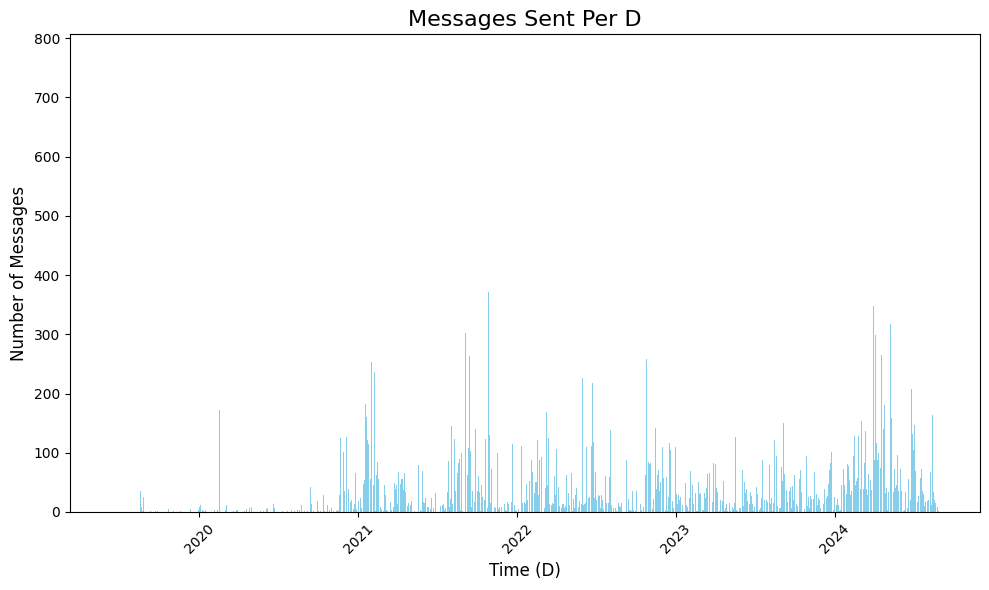

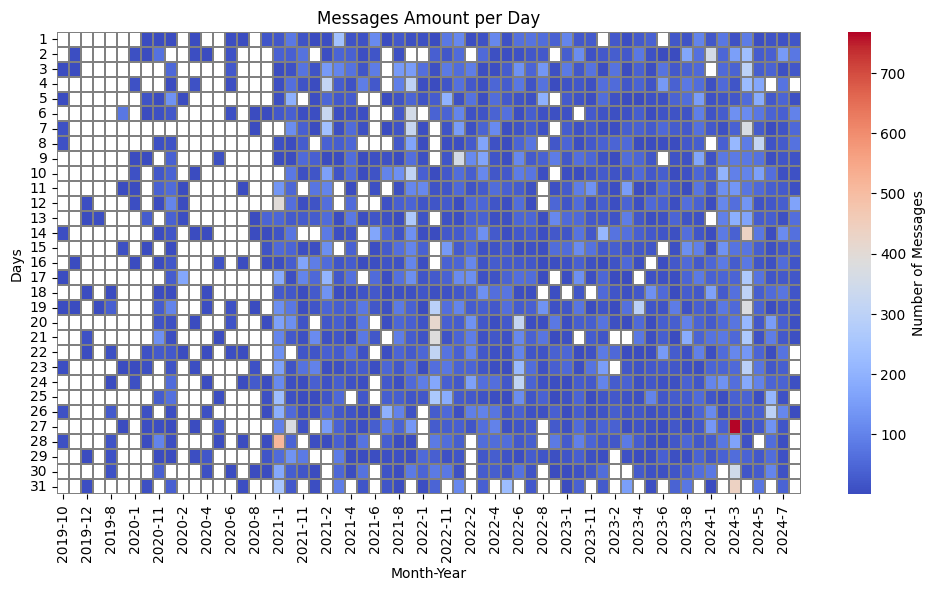

(None, None)

In [15]:
plot_message_count_over_time(data=dataset, period='D'), plot_heatmap(dataset)

In [16]:
# My most messaged day.
#dataset[dataset['Date'] == pd.to_datetime('2024-03-27')]


# Data Cleaning 

In [17]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
# def to_lowercase(text):
#     return text.lower()
def remove_urls(text):
      return re.sub(r'http\S+', 'redacted', text)
# def remove_punctuation(text):
#     translator = str.maketrans('', '', string.punctuation)
#    return text.translate(translator)
def remove_english_words(text):
    ukrainian_words = re.findall(r'\b[А-Яа-яЁёІіЇїЄєҐґ’]+\b', text)
    return ' '.join(ukrainian_words)
def delete_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text
def remove_mention(text):
  mention_regex = r"@\w+"
  return re.sub(mention_regex, "/mention", text)
def redact_email(text): 
    return re.sub(r'\S+@\S+', '/email', text)
def remove_password(text): 
    pass_pattern = r'[A-Za-z0-9@#$%^&+=]{8,}'
    text.to_string
    return re.sub(pass_pattern, ' ', text)
def remove_whitespace(text):
    return  " ".join(text.split())


In [ ]:
TO BE CONTINUED..